Accuracy: 0.9984123834094066
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2365
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



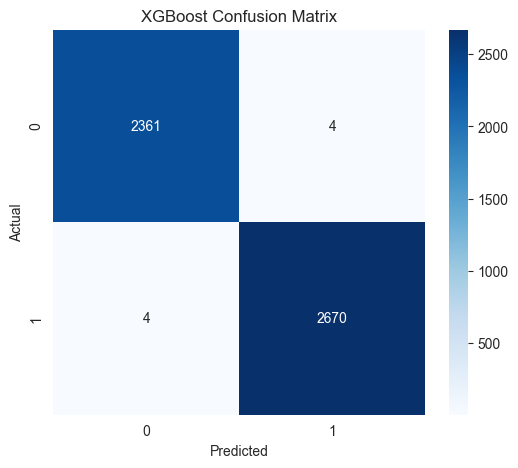


Top 10 Important Features:
src_bytes: 0.3581
protocol_type: 0.1071
hot: 0.0742
count: 0.0720
diff_srv_rate: 0.0574
dst_host_same_src_port_rate: 0.0437
dst_host_srv_count: 0.0362
dst_bytes: 0.0300
logged_in: 0.0217
dst_host_srv_diff_host_rate: 0.0208
Selected Features (95% Importance): ['src_bytes', 'protocol_type', 'hot', 'count', 'diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_count', 'dst_bytes', 'logged_in', 'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate', 'srv_count', 'root_shell', 'flag', 'service', 'dst_host_serror_rate', 'dst_host_same_srv_rate', 'duration', 'dst_host_rerror_rate', 'dst_host_diff_srv_rate']
Number of Selected Features: 20


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
file_path = "Data/Train_data.csv"
df = pd.read_csv(file_path)

# Encode categorical features
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split data
X = df.drop(columns='class')
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()

# Feature importance and selection (optional)
feature_importance = xgb_model.feature_importances_
features = X.columns
sorted_indices = np.argsort(feature_importance)[::-1]

print("\nTop 10 Important Features:")
for i in sorted_indices[:10]:
    print(f"{features[i]}: {feature_importance[i]:.4f}")

sorted_importances = feature_importance[sorted_indices]
cumulative_importance = np.cumsum(sorted_importances)
selected_features = features[sorted_indices][cumulative_importance <= 0.95]
print("Selected Features (95% Importance):", selected_features.tolist())
print("Number of Selected Features:", len(selected_features))
